In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, datetime
import random

%matplotlib inline

In [2]:
path = '../../HD2/2018/data/'

## TOP 2018 Projects

In [3]:
projects = pd.read_csv('2018_top_projects.csv', parse_dates=['created_at'])
projects.head()

,id_project,name,created_at,size,watchers_count,stars,description,url
0,177736533,996icu/996.ICU,2019-03-26 07:31:14,183401,247585,247585,b'Repo for counting stars and contributing. Pr...,https://github.com/996icu/996.ICU
1,85077558,kamranahmedse/developer-roadmap,2017-03-15 13:45:52,23724,89556,89556,b'Roadmap to becoming a web developer in 2019',https://github.com/kamranahmedse/developer-roa...
2,121395510,CyC2018/CS-Notes,2018-02-13 14:56:24,107593,81447,81447,b':books: Tech Interview Guide \xe6\x8a\x80\xe...,https://github.com/CyC2018/CS-Notes
3,83222441,donnemartin/system-design-primer,2017-02-26 16:15:28,4339,75512,75512,b'Learn how to design large-scale systems. Pre...,https://github.com/donnemartin/system-design-p...
4,123458551,jackfrued/Python-100-Days,2018-03-01 16:05:52,199006,65994,65994,b'Python - 100\xe5\xa4\xa9\xe4\xbb\x8e\xe6\x96...,https://github.com/jackfrued/Python-100-Days


In [4]:
projects.shape

(1392, 8)

In [5]:
projects.stars.min()

363

In [6]:
target = projects[projects['created_at'] < datetime(2018, 1, 1)]

In [7]:
target.shape

(863, 8)

In [8]:
target = target.iloc[:500]

In [13]:
target[['stars', 'size']].describe()

,stars,size
count,500.000000,5.000000e+02
mean,8536.640000,5.871216e+04
std,8365.924607,2.839837e+05
min,888.000000,1.000000e+01
25%,4567.250000,1.204750e+03
50%,6175.000000,6.854000e+03
75%,9223.250000,2.926925e+04
max,89556.000000,5.658142e+06


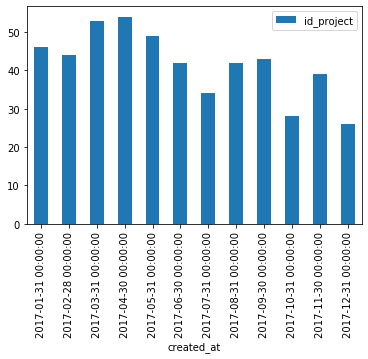

In [17]:
target.set_index('created_at').groupby(pd.Grouper(freq='M'))[['id_project']].count().plot.bar()

In [14]:
target.to_csv('target_p_2018.csv', index=None)

Get all the activities for each month for all the target projects

In [18]:
outdata = pd.DataFrame()
for month in ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']:
    mdf = pd.read_csv(path + 'activity_2018_{}.csv'.format(month), header=None)
    mdf.columns = ['source', 'target', 'event', 'created_at']
    tgta = mdf[mdf['target'].isin(target.id_project)]
    outdata = pd.concat([outdata, tgta])

In [19]:
outdata.head()

,source,target,event,created_at
3,34407843,94911145,WatchEvent,2018-01-09T03:00:00Z
126,20942571,103645588,PushEvent,2018-01-09T03:00:08Z
417,30802089,101394335,IssueCommentEvent,2018-01-09T03:00:23Z
509,34146419,88111990,ForkEvent,2018-01-09T03:00:28Z
574,1789,113402414,WatchEvent,2018-01-09T03:00:32Z


In [20]:
outdata.shape

(2999985, 4)

In [21]:
outdata.to_csv('target_a_2018.csv', index=None)

## RANDOM 2018 Projects

In [24]:
top_ids = target.id_project.values
top_ids[:10]

array([ 85077558,  83222441,  90796663, 100060912, 112507086,  88464704,
       101296881,  81975372, 107111421, 103633984])

In [25]:
# select randomly 500 projects from January dump that are not in the top-500 dataset
data = pd.read_csv(path + 'activity_2018_01.csv', header=None)
data.columns = ['source', 'target', 'event', 'created_at']

projects = data['target'].unique()
print(len(projects))

4019885


In [26]:
projects_no_top = set(projects) - set(top_ids)

In [27]:
len(projects_no_top)

4019400

In [30]:
N = 500
p_sample = random.sample(population=list(projects_no_top), k=N)

In [31]:
set(p_sample).intersection(set(top_ids))

set()

In [33]:
outdata = pd.DataFrame()
for month in ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']:
    mdf = pd.read_csv(path + 'activity_2018_{}.csv'.format(month), header=None)
    mdf.columns = ['source', 'target', 'event', 'created_at']
    tgta = mdf[mdf['target'].isin(p_sample)]
    outdata = pd.concat([outdata, tgta])

In [34]:
outdata.head()

,source,target,event,created_at
18408,31112174,116623421,PushEvent,2018-01-09T03:20:29Z
24091,31112174,116623421,PushEvent,2018-01-09T03:27:01Z
45666,22441396,116756658,PushEvent,2018-01-09T03:53:14Z
55302,26319209,101191801,PushEvent,2018-01-23T07:04:50Z
88080,31496399,118575282,CreateEvent,2018-01-23T07:37:58Z


In [37]:
outdata.shape

(24795, 4)

In [35]:
outdata.to_csv('random_a_2018.csv', index=None)

In [38]:
with open('random_p_2018.txt', 'w') as pfile:
    pfile.write('\n'.join([str(x) for x in p_sample]))